# Super Resolution implemetation of Deep Image Prior using Keras

Connecting to Gdrive

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# File locations
dir = '/content/drive/My Drive/Colab Notebooks/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [5]:
cd drive

/content/drive


In [6]:
!ls

'My Drive'


In [8]:
cd My\ Drive


/content/drive/My Drive


In [9]:
!ls

 bsd200.zip
'Colab Notebooks'
'DEFENSE DOCUMENTS (1).zip'
'DEFENSE DOCUMENTS.zip'
'Getting started.pdf'
'hyxwsdfxynbzpfcxnpxmvmnhcjcrcfch (1).pdf'
 hyxwsdfxynbzpfcxnpxmvmnhcjcrcfch.pdf
 lapsrn_train.h5
'RESEARCH FUNDS.zip'
 vscdqykqswkfswwqqdjyjcfcdzdkhpmc.zip
 Wazir_Electronics_Paper.pdf


In [10]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [11]:
!ls

 1LECTUREBYSENDEX.ipynb
'2SCALEWAZIRMODEL (1).ipynb'
 2SCALEWAZIRMODEL.ipynb
 4SCALEWAZIRMODEL.ipynb
'6Convolutions Over Volumes.ipynb'
'7C4W1L07_ONE LAYER_OF_A_CONVOLUTIONAL_NET.ipynb'
 ABC.zip
 Activation_Function_Draw.ipynb
 AHLAD_DL_1_7.ipynb
 AsymmetricConvolution.ipynb
 BATCH_NORMALIZATION_AND_WITHOUT_BATCH_NORMALIZATION.ipynb
 Classification.ipynb
 COLOR_IMAGES_COMPLETE_DIRECTORY_INTO_BLACKANDWHITEIMAGE.ipynb
'Copy of CelebA Deblurring.ipynb'
'Copy of TESTMODELONSCALE4SET5.ipynb'
 create_data.ipynb
 CUDA_AVAILABLE_IN_TORCH.ipynb
'DataAugmentation (1).ipynb'
 DataAugmentation.ipynb
 DEPTH_WISE_SEPARABLE_CONVOLUTION.ipynb
 DISPLAYMOREIMAGES.ipynb
 DRAW_SRCNN_MODEL.ipynb
 FEED_BACK_MODELS.ipynb
 FirstProgram.ipynb
 FSRCNN.ipynb
 FUNCTION_READ.ipynb
 GENERALTRAININGMODEL.ipynb
 GRAY_SCALE_TO_COLOR_IMAGE.ipynb
 IMAGES_READ_MULTIPLE_DIRECTORY.ipynb
'Image Super Resolution (1).ipynb'
'Image Super Resolution.ipynb'
 IMSHOW_GOOGLE_COLAB.ipynb
 INCEPTION_SUMMARY.ipynb
 INTERNET_IMAGE_READ

In [0]:
cd d

Importing packages

In [0]:
import tensorflow as tf

import numpy as np

from tensorflow.keras.applications import inception_v3
from tensorflow.keras import backend as K
import tensorflow.keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Lambda

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

K.set_image_data_format('channels_last')
K.image_data_format()

tf.enable_eager_execution()

Loading image

In [28]:
from google.colab import files
uploaded = files.upload()

Saving zebra.bmp to zebra.bmp


In [29]:
!ls

 1LECTUREBYSENDEX.ipynb
'2SCALEWAZIRMODEL (1).ipynb'
 2SCALEWAZIRMODEL.ipynb
 4SCALEWAZIRMODEL.ipynb
'6Convolutions Over Volumes.ipynb'
'7C4W1L07_ONE LAYER_OF_A_CONVOLUTIONAL_NET.ipynb'
 ABC.zip
 Activation_Function_Draw.ipynb
 AHLAD_DL_1_7.ipynb
 AsymmetricConvolution.ipynb
 BATCH_NORMALIZATION_AND_WITHOUT_BATCH_NORMALIZATION.ipynb
 Classification.ipynb
 COLOR_IMAGES_COMPLETE_DIRECTORY_INTO_BLACKANDWHITEIMAGE.ipynb
'Copy of CelebA Deblurring.ipynb'
'Copy of TESTMODELONSCALE4SET5.ipynb'
 create_data.ipynb
 CUDA_AVAILABLE_IN_TORCH.ipynb
'DataAugmentation (1).ipynb'
 DataAugmentation.ipynb
 DEPTH_WISE_SEPARABLE_CONVOLUTION.ipynb
 DISPLAYMOREIMAGES.ipynb
 DRAW_SRCNN_MODEL.ipynb
 FEED_BACK_MODELS.ipynb
 FirstProgram.ipynb
 FSRCNN.ipynb
 FUNCTION_READ.ipynb
 GENERALTRAININGMODEL.ipynb
 GRAY_SCALE_TO_COLOR_IMAGE.ipynb
 IMAGES_READ_MULTIPLE_DIRECTORY.ipynb
'Image Super Resolution (1).ipynb'
'Image Super Resolution.ipynb'
 IMSHOW_GOOGLE_COLAB.ipynb
 INCEPTION_SUMMARY.ipynb
 INTERNET_IMAGE_READ

In [0]:
SCALING_FACTOR = 2
encoding_size = 128
perturbation_max = 40


base_dir = '/content/drive/My Drive/Colab Notebooks/'
path_to_image = base_dir + '/zebra.bmp'
img_orig = Image.open(path_to_image)
img_orig_np = np.array(img_orig).astype(np.float32) / 255

In [31]:
img_orig_np.shape

(391, 586, 3)

In [0]:
img_bicubic = img_orig.resize((int(img_orig.size[0] * SCALING_FACTOR), int(img_orig.size[1] * SCALING_FACTOR)), Image.BICUBIC)
img_bicubic
img_bicubic_np = np.array(img_bicubic).astype(np.float32) / 255

In [0]:
h, w, ch = img_bicubic_np.shape
if h % 64 != 0:
    crop_h = h // 64 * 64
if w % 64 != 0:
    crop_w = w // 64 * 64

img_bicubic_crop = img_bicubic_np[0:crop_h, 0:crop_w, :]

In [34]:
img_bicubic_crop.shape

(768, 1152, 3)

Define model

In [0]:
input_depth = 32
input_dims = (1, crop_h, crop_w, input_depth)

net_input = K.random_uniform(input_dims) #add var

In [36]:
input_dims

(1, 768, 1152, 32)

In [0]:
# base_model = inception_v3.InceptionV3(weights=None, include_top=False, input_shape=input_dims[1:], pooling='avg')
# x = base_model.get_layer('mixed10').output
# x = ZeroPadding2D((1,1))(x)
# x = Convolution2D(256, 3, padding = 'same', activation = 'relu')(x)
# x = BatchNormalization()(x)
# x = UpSampling2D()(x)
# x = Convolution2D(128, 3, padding = 'same', activation = 'relu')(x)
# x = BatchNormalization()(x)
# x = UpSampling2D()(x)
# x = Convolution2D(64, 3, padding = 'same', activation = 'relu')(x)
# x = BatchNormalization()(x)
# x = UpSampling2D()(x)
# x = Convolution2D(32, 3, padding = 'same', activation = 'relu')(x)
# x = BatchNormalization()(x)
# x = UpSampling2D()(x)
# x = Convolution2D(16, 3, padding = 'same', activation = 'relu')(x)
# x = BatchNormalization()(x)
# x = UpSampling2D()(x)
# x = Convolution2D(3, 3, padding = 'same', activation = 'relu')(x)
# model = Model(inputs=base_model.input, outputs=x)

In [0]:
def UpSampling2DBilinear(size):
    return Lambda(lambda x: tf.image.resize_bilinear(x, size, align_corners=True))

model = Sequential([
    Convolution2D(32, 3, padding = 'same', input_shape = input_dims[1:], activation = 'relu'),
    Convolution2D(32, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Convolution2D(64, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Convolution2D(128, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Convolution2D(256, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Convolution2D(256, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Convolution2D(512, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Convolution2D(512, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    UpSampling2D(),
    Convolution2D(256, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    UpSampling2D(),
    Convolution2D(128, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    UpSampling2D(),
    Convolution2D(64, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    UpSampling2D(),    
    Convolution2D(32, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    UpSampling2D(),
    Convolution2D(16, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    UpSampling2D(),
    Convolution2D(16, 3, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    Convolution2D(3, 3, padding = 'same', activation = 'tanh')
])

In [0]:
import keras

In [40]:
keras.utils.plot_model(model, 'my_first_model.png')

TypeError: ignored

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 768, 1152, 32)     9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 768, 1152, 32)     9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 768, 1152, 32)     128       
_________________________________________________________________
average_pooling2d (AveragePo (None, 384, 576, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 384, 576, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 384, 576, 64)      256       
_________________________________________________________________
average_pooling2d_1 (Average (None, 192, 288, 64)      0

In [0]:
model.compile(tf.train.AdamOptimizer(), loss = 'mse')

In [0]:
n_epochs = 10
img_batch = np.expand_dims(img_bicubic_crop,0)

fit_params = {
    'x': net_input,
    'y': img_batch,
    'epochs': n_epochs,
    'batch_size': 1,
    'verbose': 0,
    'steps_per_epoch': 1
}

In [51]:
img_batch.shape

(1, 768, 1152, 3)

Run model

In [0]:
#TODO add variance to net_input and change randomisation method
#2D bilinear upscaling

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:10


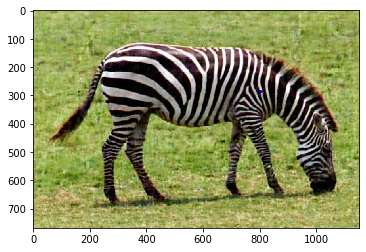

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:20


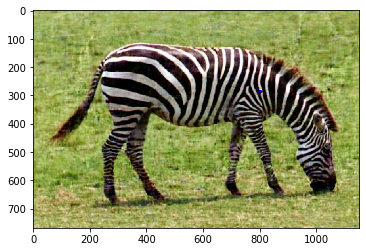

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:30


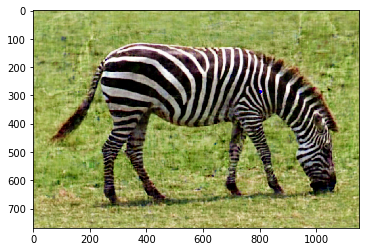

In [53]:
for i in range(3):
    model.fit(**fit_params)
    img_pred = model.predict(net_input, steps=1)
    print('Epoch:' + str((i+1) * n_epochs))
    plt.imshow(img_pred[0])
    plt.show()

In [48]:
!ls

 1LECTUREBYSENDEX.ipynb
'2SCALEWAZIRMODEL (1).ipynb'
 2SCALEWAZIRMODEL.ipynb
 4SCALEWAZIRMODEL.ipynb
'6Convolutions Over Volumes.ipynb'
'7C4W1L07_ONE LAYER_OF_A_CONVOLUTIONAL_NET.ipynb'
 ABC.zip
 Activation_Function_Draw.ipynb
 AHLAD_DL_1_7.ipynb
 AsymmetricConvolution.ipynb
 BATCH_NORMALIZATION_AND_WITHOUT_BATCH_NORMALIZATION.ipynb
 Classification.ipynb
 COLOR_IMAGES_COMPLETE_DIRECTORY_INTO_BLACKANDWHITEIMAGE.ipynb
'Copy of CelebA Deblurring.ipynb'
'Copy of TESTMODELONSCALE4SET5.ipynb'
 create_data.ipynb
 CUDA_AVAILABLE_IN_TORCH.ipynb
'DataAugmentation (1).ipynb'
 DataAugmentation.ipynb
 DEPTH_WISE_SEPARABLE_CONVOLUTION.ipynb
 DISPLAYMOREIMAGES.ipynb
 DRAW_SRCNN_MODEL.ipynb
 FEED_BACK_MODELS.ipynb
 FirstProgram.ipynb
 FSRCNN.ipynb
 FUNCTION_READ.ipynb
 GENERALTRAININGMODEL.ipynb
 GRAY_SCALE_TO_COLOR_IMAGE.ipynb
 IMAGES_READ_MULTIPLE_DIRECTORY.ipynb
'Image Super Resolution (1).ipynb'
'Image Super Resolution.ipynb'
 IMSHOW_GOOGLE_COLAB.ipynb
 INCEPTION_SUMMARY.ipynb
 INTERNET_IMAGE_READ

In [47]:
import cv2

out_name = 'out/keras_zebra.jpg'
# Save the image to disk
cv2.imwrite(base_dir + out_name, cv2.cvtColor(255 * img_pred[0], cv2.COLOR_RGB2BGR))
#cv2.imwrite(base_dir + out_name, img_pred[0] * 255)

False

In [49]:
out_name = 'out/keras_zebra_bc.jpg'
# Save the image to disk
cv2.imwrite(base_dir + out_name, cv2.cvtColor(255 * img_bicubic_np, cv2.COLOR_RGB2BGR))


False